In [33]:
## In this section we will do some preparation for later analysis and will show and visualize some descriptive statistics of the data

In [37]:
## Importing all the necessary libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import urllib3
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
## loading the csv file which was created after scraping the IMDb website
imdb_top_movies = pd.read_csv("imdb_top_movies.csv")
imdb_top_movies = imdb_top_movies.astype({"year": int})

In [39]:
## transforming the year into decades
imdb_top_movies["decades"] = (imdb_top_movies["year"]//10)*10
imdb_top_movies["decades"].sort_values().value_counts()

2010    46
2000    46
1990    41
1980    29
1950    24
1970    19
1960    19
1940    10
1920     7
1930     6
2020     3
Name: decades, dtype: int64

In [ ]:
##

There are 64 movies with an average runtime of 95 minutes in the first quantile (0-25%)
There are 63 movies with an average runtime of 118 minutes in the second quantile (25-50%)
There are 60 movies with an average runtime of 134 minutes in the third quantile (50-75%)
There are 63 movies with an average runtime of 171 minutes in the fourth quantile (75-100%)


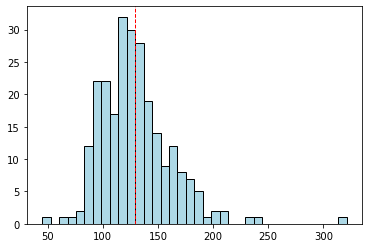

In [40]:
## have a look at different running times numerically but also visually

## make a histogram of the running time using matplot
plt.hist(imdb_top_movies["runtime"], color = 'lightblue', edgecolor = 'black',
         bins = int(180/5))
## add red line with the average runtime
plt.axvline(imdb_top_movies["runtime"].mean(), color='red', linestyle='dashed', linewidth=1)

## in a second step we would like to also define quantiles and then plot them
## define different quantilies 
q0 = imdb_top_movies["runtime"].quantile(0)
q25=imdb_top_movies["runtime"].quantile(0.25)
q50=imdb_top_movies["runtime"].quantile(0.5)
q75=imdb_top_movies["runtime"].quantile(0.75)
q100=imdb_top_movies["runtime"].quantile(1)

## filter each film based on its runtime and store it in a new value
first_quantile = imdb_top_movies[imdb_top_movies["runtime"] <= q25]
first_quantile_count = first_quantile["runtime"].count()

second_quantile = imdb_top_movies[(imdb_top_movies["runtime"] > q25) & (imdb_top_movies["runtime"] <= q50)]
second_quantile_count = second_quantile["runtime"].count()

third_quantile = imdb_top_movies[(imdb_top_movies["runtime"] > q50) & (imdb_top_movies["runtime"] <= q75)]
third_quantile_count = third_quantile["runtime"].count()

fourth_quantile = imdb_top_movies[imdb_top_movies["runtime"] > q75]
fourth_quantile_count = fourth_quantile["runtime"].count()

## calculate average running time of each quantile below and round results full numbers

q25_mean = round(sum(first_quantile["runtime"])/first_quantile_count)
q50_mean = round(sum(second_quantile["runtime"])/second_quantile_count)
q75_mean = round(sum(third_quantile["runtime"])/third_quantile_count)
q100_mean = round(sum(fourth_quantile["runtime"])/fourth_quantile_count)

## printing the quantiles and the average of each quantile below
print("There are",first_quantile_count,"movies with an average runtime of", q25_mean,"minutes in the first quantile (0-25%)")
print("There are",second_quantile_count,"movies with an average runtime of", q50_mean, "minutes in the second quantile (25-50%)")
print("There are",third_quantile_count,"movies with an average runtime of", q75_mean, "minutes in the third quantile (50-75%)")
print("There are",fourth_quantile_count,"movies with an average runtime of", q100_mean, "minutes in the fourth quantile (75-100%)")

